**1.Target:**

1. Add more layer to current architecture

**2.Results**:

1.   Parameters :7904
2.   Best Train Accuracy: 98.60
3.   Best Test Accuracy: 99.39


**3.Analysis:**

Model has 7904 paramter after adding capacity of model test accuracy is improved from 98.07 to 99.39 as we know when We can also increase the capacity of the model by adding a layer after GAP! here we did the same we added one extra layer after GAP and also increases the paramter


In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 207314660.35it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42849555.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 67071644.39it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5741569.85it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
dropout_value = .05
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels= 32,kernel_size= (3, 3), padding=0, bias=False),    #output_image = 26, RF=3
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.Dropout2d(dropout_value)
            )

        #Transition BLOCK 1
        self.trans1 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels= 8,kernel_size= (1, 1), padding=0, bias=False),    #output_image = 26, RF=3
            nn.ReLU(),
            nn.BatchNorm2d(num_features=8),
            nn.Dropout2d(dropout_value)
        )

        #CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=8,out_channels= 10,kernel_size= (3, 3), padding=0, bias=False),    #output_image = 24, RF=5
            nn.ReLU(),
            nn.BatchNorm2d(num_features=10),
            nn.Dropout2d(dropout_value)
        )
        self.pool1 = nn.MaxPool2d(2, 2)    #output_image = 12, RF=6


        #CONVOLUTION BLOCK 2
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=16 ,kernel_size= (3, 3), padding=1, bias=False),    #output_image = 10, RF=10
            nn.ReLU(),
            nn.BatchNorm2d(num_features=16),
            nn.Dropout2d(dropout_value)
        )

        #TRANSITION BLOCK 2
        self.trans2 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels= 10,kernel_size= (1, 1), padding=0, bias=False),    #output_image = 10, RF=10
            nn.ReLU(),
            nn.BatchNorm2d(num_features=10),
            nn.Dropout2d(dropout_value)
        )

        #CONVOLUTION BLOCK 3
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels= 10,kernel_size= (3, 3), padding=0, bias=False),    #output_image = 8, RF=14
            nn.ReLU(),
            nn.BatchNorm2d(num_features=10),
            nn.Dropout2d(dropout_value)
        )

        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels= 16,kernel_size= (3, 3), padding=0, bias=False),    #output_image = 8, RF=20
            nn.ReLU(),
            nn.BatchNorm2d(num_features=16),
            nn.Dropout2d(dropout_value)
        )

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels= 16,kernel_size= (3, 3), padding=0, bias=False),    #output_image = 6, RF=24
            nn.ReLU(),
            nn.BatchNorm2d(num_features=16),
            nn.Dropout2d(dropout_value)
        )


        #GAP Layer
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=6),

        )

        # FC layer
        self.trans3 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels= 10,kernel_size= (1, 1), padding=0, bias=False),

        )


    def forward(self, x):
      x = self.convblock1(x)
      x = self.trans1(x)
      x = self.convblock2(x)
      x = self.pool1(x)
      x = self.convblock3(x)
      x = self.trans2(x)
      x = self.convblock4(x)
      x = self.convblock5(x)
      x = self.convblock6(x)
      x = self.gap(x)
      x =self.trans3(x)
      x = x.view(-1, 10)
      return F.log_softmax(x, dim=-1)


In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
         Dropout2d-4           [-1, 32, 26, 26]               0
            Conv2d-5            [-1, 8, 26, 26]             256
              ReLU-6            [-1, 8, 26, 26]               0
       BatchNorm2d-7            [-1, 8, 26, 26]              16
         Dropout2d-8            [-1, 8, 26, 26]               0
            Conv2d-9           [-1, 10, 24, 24]             720
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
        Dropout2d-12           [-1, 10, 24, 24]               0

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))

In [ ]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.10388770699501038 Batch_id=468 Accuracy=83.06: 100%|██████████| 469/469 [00:24<00:00, 19.47it/s]



Test set: Average loss: 0.0664, Accuracy: 9833/10000 (98.33%)

EPOCH: 1


Loss=0.10006391257047653 Batch_id=468 Accuracy=96.57: 100%|██████████| 469/469 [00:20<00:00, 22.43it/s]



Test set: Average loss: 0.0414, Accuracy: 9875/10000 (98.75%)

EPOCH: 2


Loss=0.0593702495098114 Batch_id=468 Accuracy=97.39: 100%|██████████| 469/469 [00:19<00:00, 24.39it/s]



Test set: Average loss: 0.0333, Accuracy: 9896/10000 (98.96%)

EPOCH: 3


Loss=0.06572175770998001 Batch_id=468 Accuracy=97.68: 100%|██████████| 469/469 [00:20<00:00, 22.87it/s]



Test set: Average loss: 0.0325, Accuracy: 9904/10000 (99.04%)

EPOCH: 4


Loss=0.09627527743577957 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:19<00:00, 24.56it/s]



Test set: Average loss: 0.0261, Accuracy: 9911/10000 (99.11%)

EPOCH: 5


Loss=0.10435185581445694 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:19<00:00, 24.10it/s]



Test set: Average loss: 0.0266, Accuracy: 9919/10000 (99.19%)

EPOCH: 6


Loss=0.05847175419330597 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:20<00:00, 23.19it/s]



Test set: Average loss: 0.0239, Accuracy: 9920/10000 (99.20%)

EPOCH: 7


Loss=0.048789843916893005 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:18<00:00, 24.74it/s]



Test set: Average loss: 0.0240, Accuracy: 9919/10000 (99.19%)

EPOCH: 8


Loss=0.015741830691695213 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:18<00:00, 24.84it/s]



Test set: Average loss: 0.0217, Accuracy: 9931/10000 (99.31%)

EPOCH: 9


Loss=0.04582488164305687 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:20<00:00, 23.18it/s]



Test set: Average loss: 0.0228, Accuracy: 9926/10000 (99.26%)

EPOCH: 10


Loss=0.06821564584970474 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:18<00:00, 24.69it/s]



Test set: Average loss: 0.0233, Accuracy: 9930/10000 (99.30%)

EPOCH: 11


Loss=0.03941473737359047 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:18<00:00, 24.81it/s]



Test set: Average loss: 0.0214, Accuracy: 9929/10000 (99.29%)

EPOCH: 12


Loss=0.06326310336589813 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:20<00:00, 22.90it/s]



Test set: Average loss: 0.0200, Accuracy: 9939/10000 (99.39%)

EPOCH: 13


Loss=0.045084428042173386 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:18<00:00, 24.88it/s]



Test set: Average loss: 0.0222, Accuracy: 9928/10000 (99.28%)

EPOCH: 14


Loss=0.03190317749977112 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:20<00:00, 23.39it/s]



Test set: Average loss: 0.0209, Accuracy: 9934/10000 (99.34%)



Text(0.5, 1.0, 'Test Accuracy')

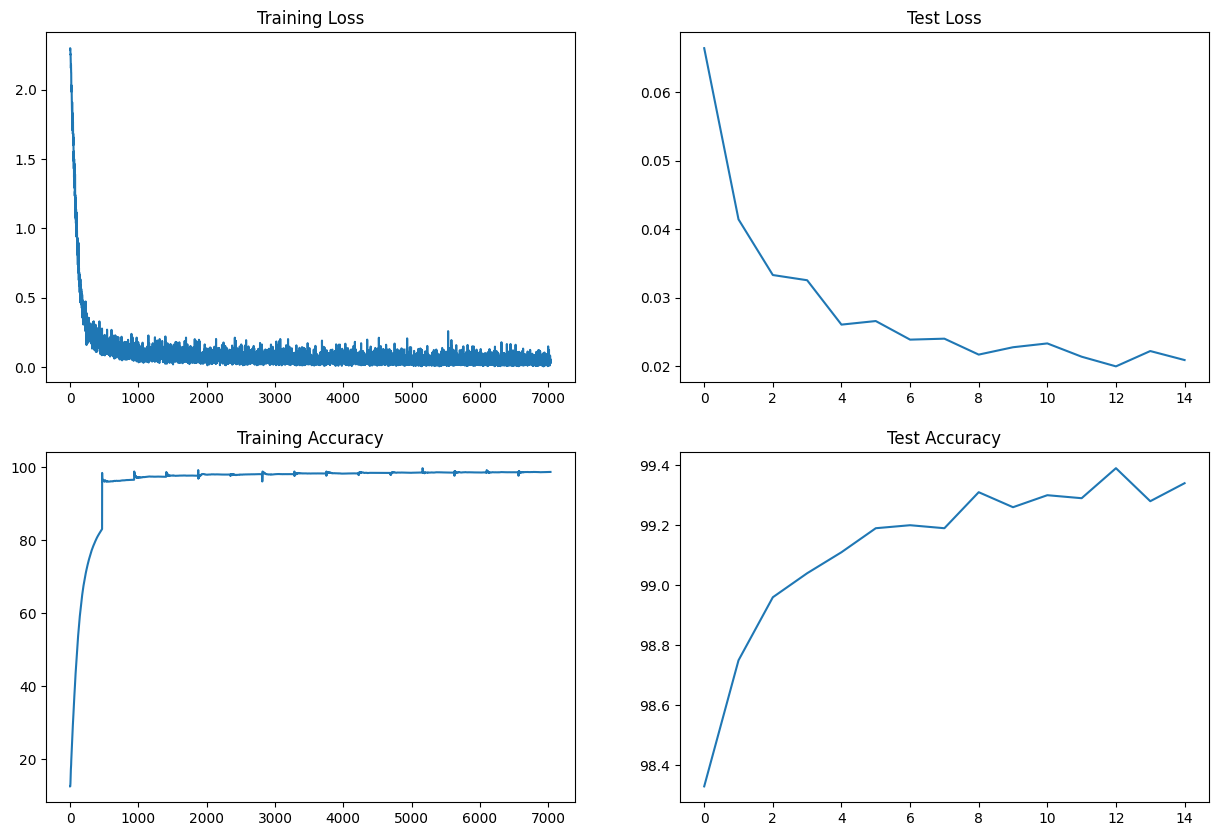

In [ ]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")